## Weather Analysis

#### Background: Created a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. Python library (https://pypi.python.org/pypi/citipy) and the OpenWeatherMap API (https://openweathermap.org/api) were utilized.

In [1]:
import requests
import json
import numpy as np
import api_keys
import pandas as pd

from citipy import citipy

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = list(zip(lats, lngs))
cities = []

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

len(cities)

575

In [3]:
# print('Beginning Data Retrieval')
# print('------------------------')
api_key =""
city_data = []
for i,city in enumerate(cities):
    url = 'https://api.openweathermap.org/data/2.5/weather?q={}&appid={}&units=imperial'.format(city,api_key)
    resp = requests.get(url).json()
    if resp.get('message') == 'city not found':
        print('City not found. Skipping...')
    else:
        city_data.append(resp)
#         print('Processing Record {} | {}'.format(i+1,city))

# print('------------------------')        
# print('Data Retrieval Complete')
# print('------------------------')

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

In [4]:
import csv

with open('output_data_cities.csv', 'w') as f:
    writer = csv.writer(f,lineterminator='\n')
    writer.writerow(city_data)

In [5]:
city_data[1]

{'coord': {'lon': 126.5, 'lat': 46.83},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 49.5,
  'pressure': 1003.61,
  'humidity': 70,
  'temp_min': 49.5,
  'temp_max': 49.5,
  'sea_level': 1003.61,
  'grnd_level': 983.52},
 'wind': {'speed': 8.5, 'deg': 335.001},
 'clouds': {'all': 0},
 'dt': 1552881895,
 'sys': {'message': 0.0027,
  'country': 'CN',
  'sunrise': 1552858954,
  'sunset': 1552902122},
 'id': 2034228,
 'name': 'Wangkui',
 'cod': 200}

In [6]:
df = pd.DataFrame.from_records(city_data)
df_1 = df[['clouds','coord','dt','main','name','sys','wind']]
df_1.shape

(514, 7)

In [7]:
import warnings
warnings.filterwarnings('ignore')

df_1['Cloudiness'] = df['clouds'].map(lambda x: x.get('all'))
df_1['Lng'] = df['coord'].map(lambda x: x.get('lon'))
df_1['Lat'] = df['coord'].map(lambda x: x.get('lat'))
df_1['Max Temp'] = df['main'].map(lambda x: x.get('temp_max'))
df_1['Humidity'] = df['main'].map(lambda x: x.get('humidity'))
df_1['Country'] = df['sys'].map(lambda x: x.get('country'))
df_1['Wind Speed'] = df['wind'].map(lambda x: x.get('speed'))
df_1 = df_1[['name','Cloudiness','Country','dt','Humidity','Lat','Lng','Max Temp', 'Wind Speed']]
df_1 = df_1.rename(columns={'name':'City','dt':'Date'})

In [8]:
from datetime import datetime
def convert_data(d):
    ts = int(d)
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
    
df_1['Converted_Date'] = df_1['Date'].map(convert_data)
df_1.head(15)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Converted_Date
0,Hermanus,56,ZA,1552880786,93,-34.42,19.24,62.01,3.00,2019-03-18 03:46:26
1,Wangkui,0,CN,1552881895,70,46.83,126.50,49.50,8.50,2019-03-18 04:04:55
2,Chunskiy,80,RU,1552881897,73,56.08,99.63,24.39,5.93,2019-03-18 04:04:57
3,Puerto Ayora,0,EC,1552880766,93,-0.74,-90.35,75.00,3.00,2019-03-18 03:46:06
4,Shelbyville,1,US,1552881826,69,39.41,-88.79,36.00,5.82,2019-03-18 04:03:46
5,Vaini,0,IN,1552878000,31,15.34,74.49,78.80,3.36,2019-03-18 03:00:00
6,Cayenne,0,GF,1552878000,94,4.94,-52.33,71.60,7.38,2019-03-18 03:00:00
7,Arraial do Cabo,80,BR,1552881736,96,-22.97,-42.02,79.74,6.38,2019-03-18 04:02:16
8,Bredasdorp,32,ZA,1552878000,88,-34.53,20.04,69.80,3.36,2019-03-18 03:00:00
9,Vostok,88,RU,1552881594,62,46.45,135.83,38.97,6.82,2019-03-18 03:59:54


#### Latitude vs. Temperature Plot

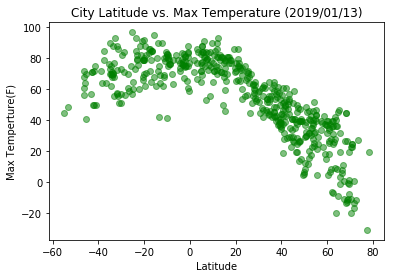

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df_1['Lat'], df_1['Max Temp'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Max Temperature (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture(F)")
plt.savefig("City Latitude vs. Max Temperature (20190113).png")

#### Latitude vs. Humidity Plot

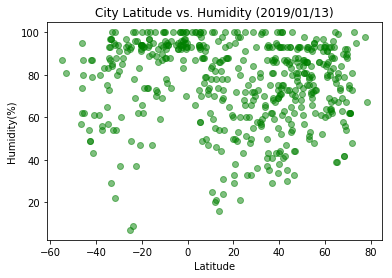

In [10]:
plt.scatter(df_1['Lat'], df_1['Humidity'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Humidity (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.savefig("City Latitude vs. Humidity (20190113).png")

#### Latitude vs. Cloudiness Plot

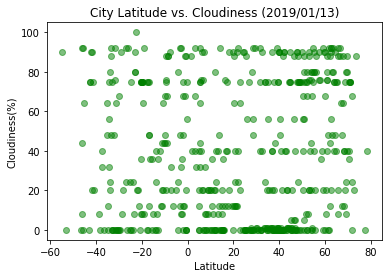

In [11]:
plt.scatter(df_1['Lat'], df_1['Cloudiness'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Cloudiness (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.savefig("City Latitude vs. Cloudiness (20190113).png")

#### Latitude vs. Wind Speed Plot

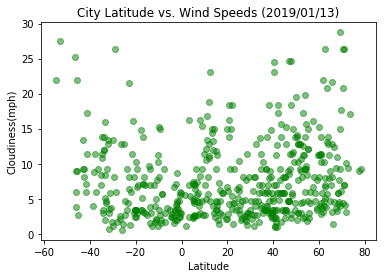

In [12]:
plt.scatter(df_1['Lat'], df_1['Wind Speed'], c="g", alpha=0.5, marker='o')
plt.title("City Latitude vs. Wind Speeds (2019/01/13)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(mph)")
plt.savefig("City Latitude vs. Wind Speeds (20190113).png")

## Data Analysis

1) As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude).In addition, the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This makes sense because in January, southern hemisphere is in summer while the northern hemisphere is in winter.

2) There is no strong relationship between latitude and Humidity. However, it is interesting to see that the humidity for cities aournd the equator were above 60%.

3) There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.